In [1]:
# https://jimmy-ai.tistory.com/52 
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [10]:
## Annual Income, Spending Score
## K-means Clustering algorithm preprocessing
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 정규화 진행
scalar = MinMaxScaler()
data_scale = scalar.fit_transform(data)

In [11]:
## random_state
from sklearn.cluster import KMeans

k = 3

# group 수, random_state 설정
model = KMeans(n_clusters=k, random_state=10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(data_scale)

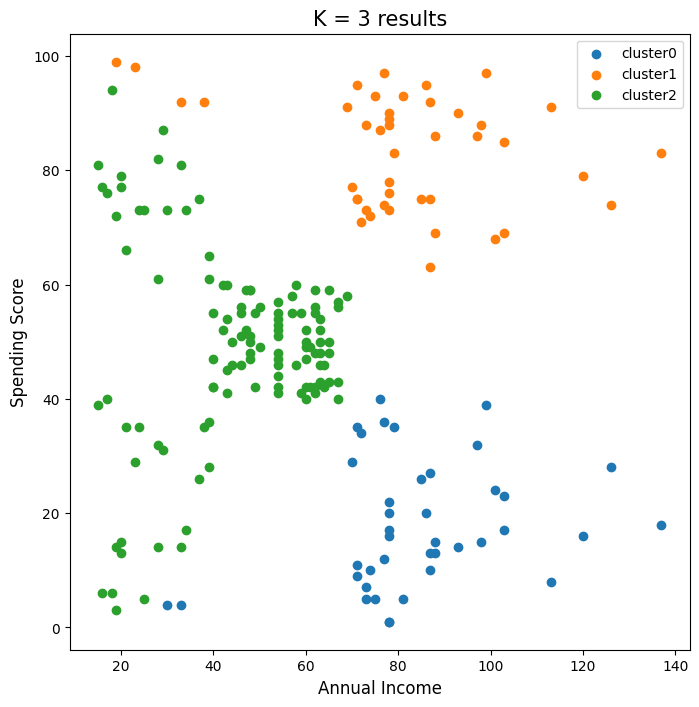

In [12]:
## K-Means Clustering 시각화
## k = 3, 4, 5, 10인 경우
import matplotlib.pyplot as plt

plt.figure(figsize= (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'Annual Income (k$)'],
                df.loc[df['cluster'] == i, 'Spending Score (1-100)'],
                label = 'cluster' + str(i))

plt.legend()
plt.title('K = %d results' %k, size=15)
plt.xlabel('Annual Income', size=12)
plt.ylabel('Spending Score', size=12)
plt.show()

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

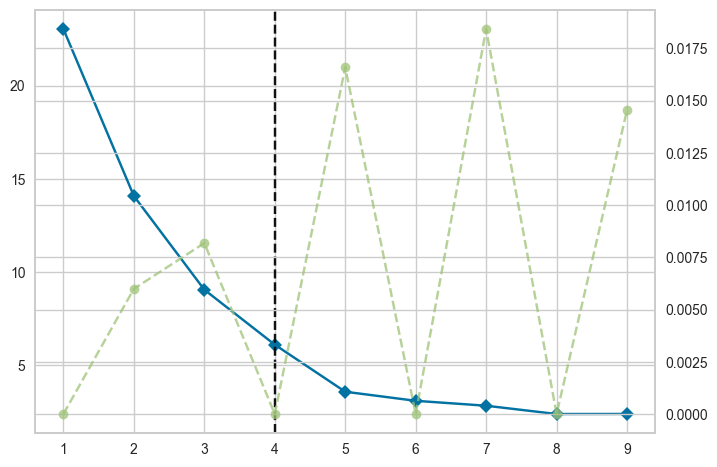

In [13]:
## K-Means Clustering k decision(Elbow Method)
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(data_scale)

In [ ]:
## MySQL 데이터베이스 연결 및 테이블 생성
import pymysql

# MySQL 연결 설정
connection = pymysql.connect(
    host="localhost",
    user="eddi",
    password="eddi@123",
    database="sk_llm_db"
)

cursor = connection.cursor()

# 테이블 생성
create_table_query = """
CREATE TABLE IF NOT EXiSTS kmeans_cluster (
    id INT AUTO_INCREMENT PRIMARY KEY,
    Annual Income INT,
    Spending Score INT
);
"""

cursor.execute(create_table_query)
connection.commit()

In [ ]:
## data insertion
insert_query = """
INSERT INTO kmeans_clusters (Annual Income, Spending Score, cluster)
VALUES (%s, %s, %s);
"""

data_to_insert = df.values.tolist()
cursor.executemany(insert_query, data_to_insert)
connection.commit()

print("Data inserted successfully!")

# connection close
cursor.close()
connection.close()